<a href="https://colab.research.google.com/github/kojeda603/ciencia_datos_2025/blob/main/09_EDA_Analisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pasos del EDA

1. Realizar un analisis descriptivo de las variables
2. Rea ajustar tipos de varibles que no sean consitentes en el momento de realizar las operaciones
3. detectar datos ausentes y tratarlos
4. identififcar datos atipicos y tratarlos para mitigar la distorsión de futuros analisis estadisticos.
5. Realizar un examen númerico entre variabkes analizadas determinando su grado de correlación

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/intro DS/titanic-train.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Diccionario de variables del dataset Titanic

 Survived: 1 = Sobrevive, 0 = No sobrevive

 sibsp: Número de hermanos o esposos a bordo

 parch: Número de padres o hijos a bordo

 ticket: Número del tiquete

 embarked: Puerto de embarque
              S: Southampton
              C: Cherbourg
              Q: Queenstown
              
 sex: male/female

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##1. Analisis descriptivo
Tomar cada una de las caracteristicas y analizarla

In [14]:
def bar_char(feature):
  servived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  test=pd.DataFrame([servived,dead])
  test.index=['Survived','Dead']
  test.plot(kind='bar',stacked=True,figsize=(10,5))

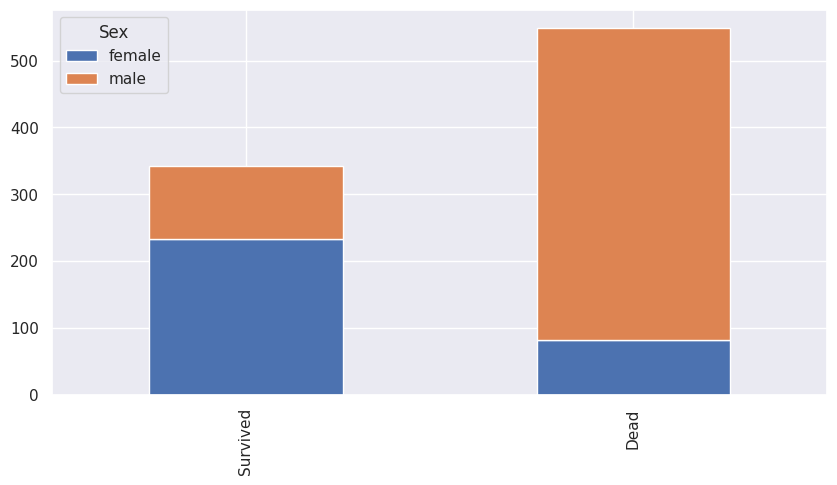

In [15]:
bar_char('Sex')

las **mujeres** mustraron mayor probabilidad de supervivencia (casi 60%) en comparacion con los hombres

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

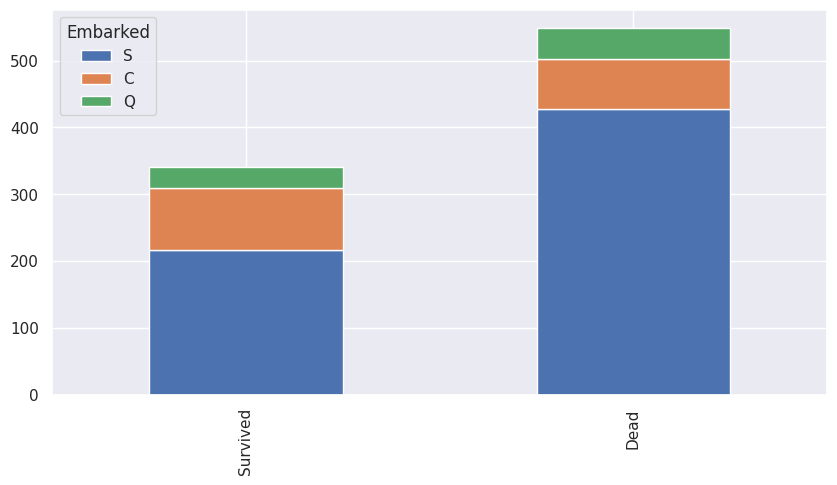

In [21]:
bar_char("Embarked")

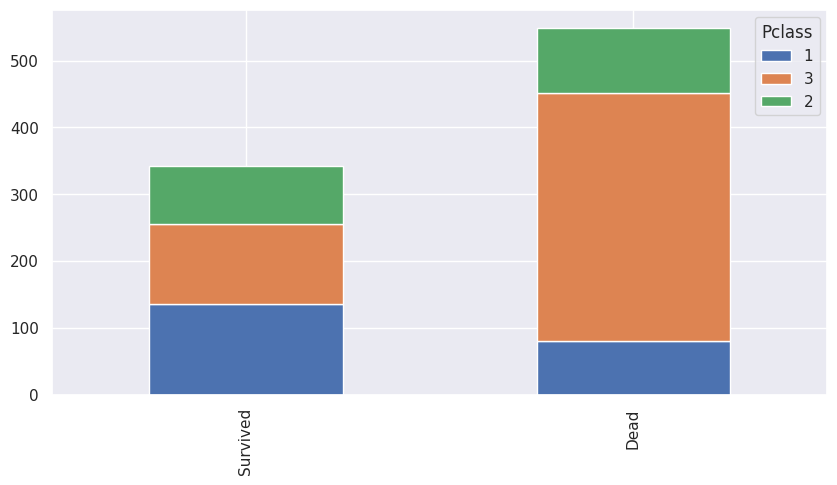

In [22]:
bar_char("Pclass")

Pclass 1 tiene mayor probabilidad de sobrevivir que Pclass 3

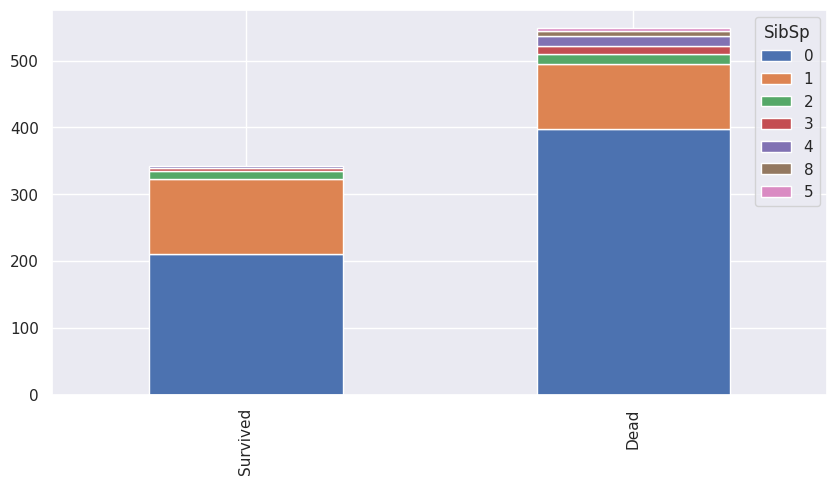

In [23]:
bar_char("SibSp")

Las personas solteras presentan menor problabilidad de supervivencia  en comparacion con aquellas casadas o con familia

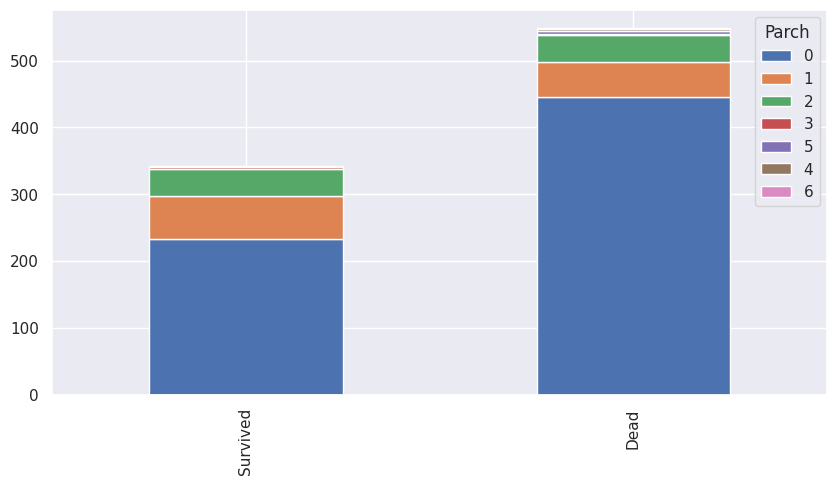

In [25]:
bar_char("Parch")

La grafica muestra que la probabilidad de supervivencia aumentaba si tenias entre 1 y 3 hijos, disminuye si eres soltero o con mas de 3 hijos

##Ingenieria de caracteristicas

Es el proceso de usar el dominio del conocimento para crear nuevas caracteristicas (feature vectors) que logre que los algoritmos de ML funcionen adecuadamente

In [28]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
222,223,0,3,"Green, Mr. George Henry",male,51.00,0,0,21440,8.0500,NaN,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
395,396,0,3,"Johansson, Mr. Erik",male,22.00,0,0,350052,7.7958,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.00,3,0,31027,21.0000,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.00,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.00,0,0,PC 17595,28.7125,C49,C
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.00,1,0,STON/O 2. 3101285,7.9250,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.00,1,1,C.A. 2673,20.2500,NaN,S
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.00,0,0,250655,26.0000,NaN,S


2. Creando feature vectors

In [45]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-4157432162.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)


In [46]:
df['Title']=extract_title(df)

In [47]:
df['Title'].sample(15)

,Title
562,Mr
225,Mr
869,Master
801,Mrs
491,Mr
471,Mr
414,Mr
428,Mr
4,Mr
539,Miss


In [48]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


2.1 Creando un mapeo de tiitulos
Renplazar
  Mr=0
  Miss=1
  Mrs=2
  Otros=3

In [49]:
def replace_title(data):
  title_mapping={"Mr":"Señor","Miss":"Señorita","Mrs":"Señora"}
  data['Title']=data['Title'].map(title_mapping).fillna("Otros")
  return data

In [50]:
df=replace_title(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor


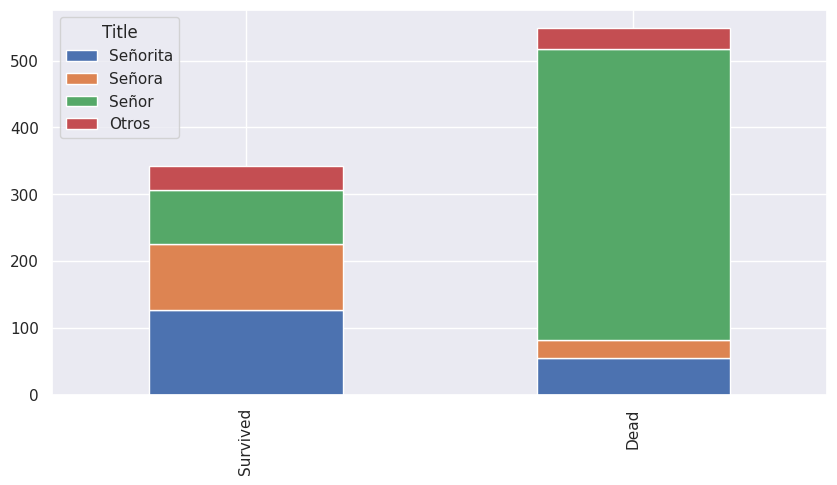

In [53]:
bar_char("Title")

In [54]:
#Eliminar informacion innecesaria

df.drop(['Name',"Ticket","Cabin"],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Señor
1,2,1,1,female,38.0,1,0,71.2833,C,Señora
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita
3,4,1,1,female,35.0,1,0,53.1000,S,Señora
4,5,0,3,male,35.0,0,0,8.0500,S,Señor


In [56]:
#2.2 Reparando la edad
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
Otros,20.430161
Señor,32.368090
Señora,35.898148
Señorita,21.773973


In [ ]:
df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)

In [57]:
df[["Title","Age"]].head(10)

,Title,Age
0,Señor,22.0
1,Señora,38.0
2,Señorita,26.0
3,Señora,35.0
4,Señor,35.0
5,Señor,NaN
6,Señor,54.0
7,Otros,2.0
8,Señora,27.0
9,Señora,14.0


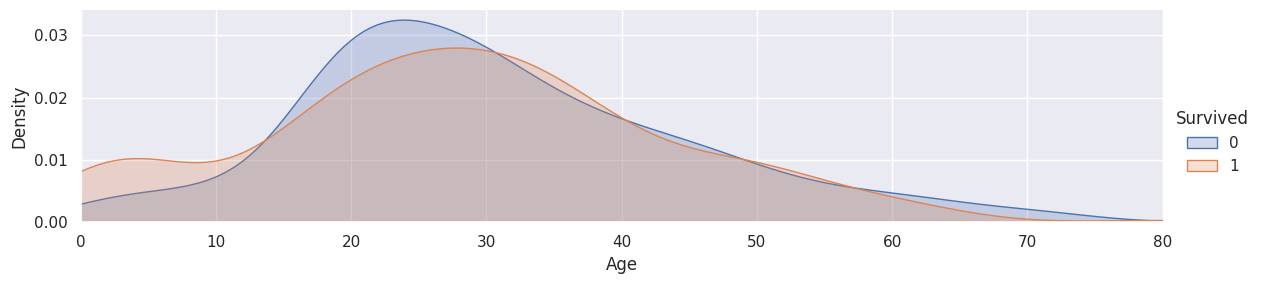

In [61]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.show()

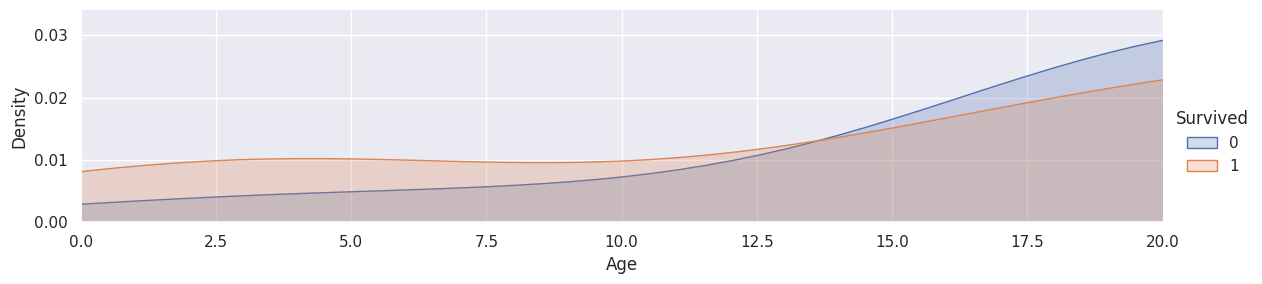

In [62]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

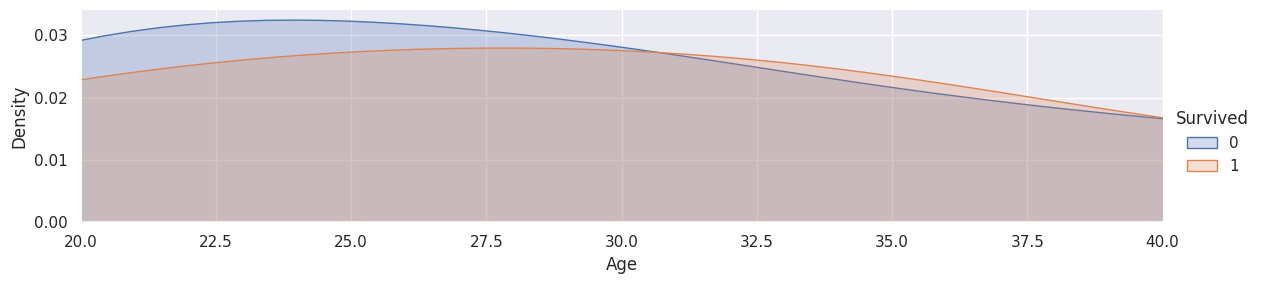

In [63]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(20,40)
plt.show()

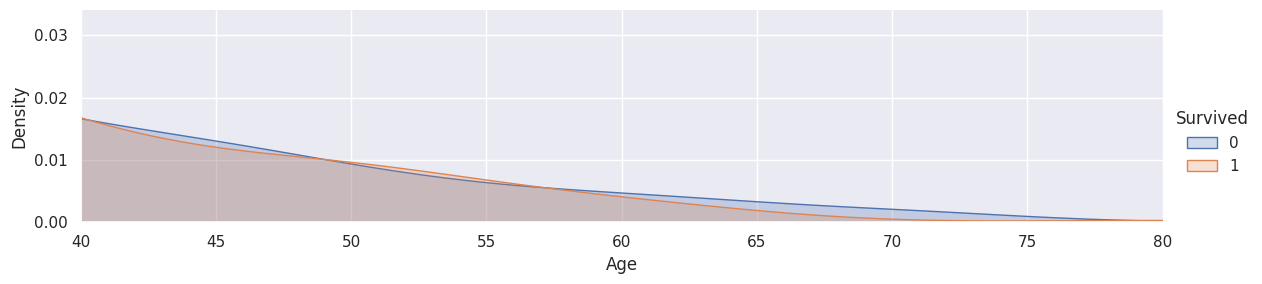

In [64]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(40,)
plt.show()

## 2.4 Binning
Convertr una variable numerica a categorica, en ese caso, la edad Mapear el feature vector



*   Niños:0
*   Joven:1
*   Adulto:3
*   Edad Madura:4
*   Edad avanzada:5




In [65]:
df["Age_category"]=pd.cut(df["Age"],bins=[0,16,26,36,62,float("inf")],labels=[0,1,2,3,4],right=False)

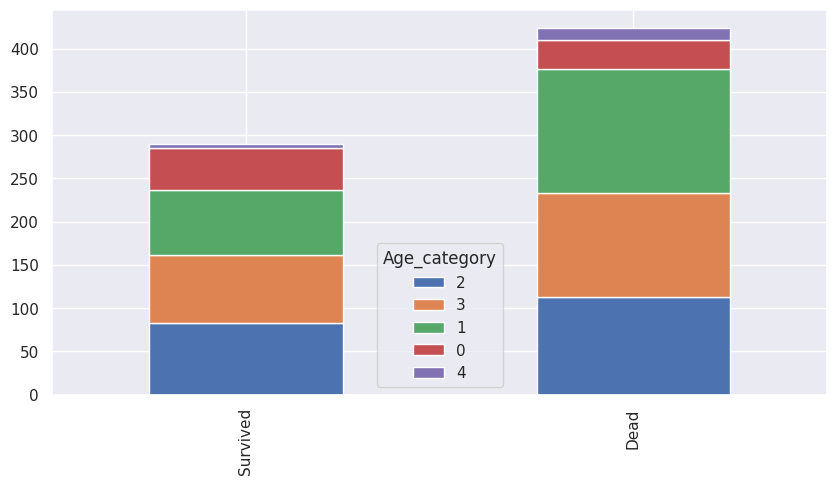

In [66]:
bar_char("Age_category")